# Математическая статистика
## Практикум 2

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
import random as rd
from collections import Counter
from collections import OrderedDict

%matplotlib inline

Укажем вариант и считаем все необходимые значения по заданному варианту группы.

In [2]:
N = 14
# достаем входные данные
data = pd.read_excel('datasets/application_to_practicum2.xlsx').loc[[N]]
o = 10 ** -5 # маленькое число, исключительно для удобства

# функция для преобразования текста в валидный код
def as_function(function):
    return function\
        .replace('^', '**')\
        .replace('x', '*x')\
        .replace('ln', 'np.log')\
        .replace('sin', 'np.sin')\
        .replace('cos', 'np.cos')\
        .replace('tan', 'np.tan')\
        .replace('exp', 'np.exp')\
        .replace('arctan', 'np.arctan')
        
# достаем нужные нам параметры
transcendental_function = as_function(data['Трансцендентная функция'].item())
polynomial = as_function(data['Полином'].item())
gamma_a = data['Показатель a для Гамма-распределения'].item()
gamma_scale = data['Показатель scale для Гамма-распределения'].item()
μ = data['Показатель \mu_1 для нормального распределения'].item()
σ = data['Показатель \sigma_1 для нормального распределения'].item()

data

,Номер варианта,Трансцендентная функция,Полином,Показатель a для Гамма-распределения,Показатель scale для Гамма-распределения,Показатель \mu_1 для нормального распределения,Показатель \sigma_1 для нормального распределения
14,14,ln(5x),4x^2+3x-2,4.650034,3.432432,2.532169,4.733873


Сделаем функцию $\chi^2$ с выравниванием чисел чтобы не было ошибке о большой разнице

In [3]:
def chisquare(expected, real):
    mapped = np.array(expected) * np.mean(real) / np.mean(expected) # трюк чтобы убрать отклонение 
    return sps.chisquare(f_exp = mapped, f_obs = real)

Сделаем функцию для преобразования набора случайных величин в плотность распределения путем дискретезации

In [4]:
def digitize(distribution, bin_count):
    bins = np.linspace(min(distribution), max(distribution), num = bin_count)
    
    counter = Counter(np.digitize(distribution, bins))
    oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))
    
    data = dict.fromkeys(bins, 0)
    
    for key, count in oredered.items():
        data[bins[key - 1]] = count
        
    sample = np.array(list(data.values()))
    return data.keys(), sample / np.sum(sample)

Сделаем функцию для проверки $p-value$

In [5]:
def check_p_value(actual, critical):
    if actual >= critical:
        print(f'Нет оснований отвергать гипотезу, p-value = {actual}')
    else:
        print (f'Гипотеза о равномерности отвергается')

### Задача 1

Смоделировать выборку объема $n=1000$ из распределения Бернулли $Bin(1,p)$, где $p$ соответствует таблице и вашему номеру варианта (приложение 1 к Практикуму2).
Проверить с помощью $\chi^2$ на соответствие данных теоретической модели.

<strong>1. Теоретическая модель</strong>

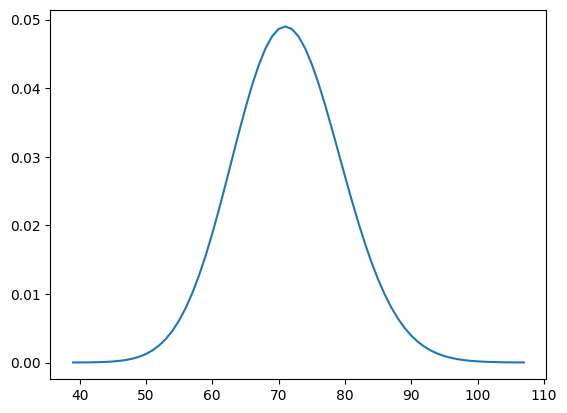

In [6]:
p = 1 / N
n = 1000
bin_count = 20
binom = sps.binom(n, p)

x = np.arange(
    binom.ppf(o),
    binom.ppf(1 - o)
)
theory_binom = binom.pmf(x)

plt.plot(x, theory_binom)
plt.show()

<strong>2. Моделирование</strong>

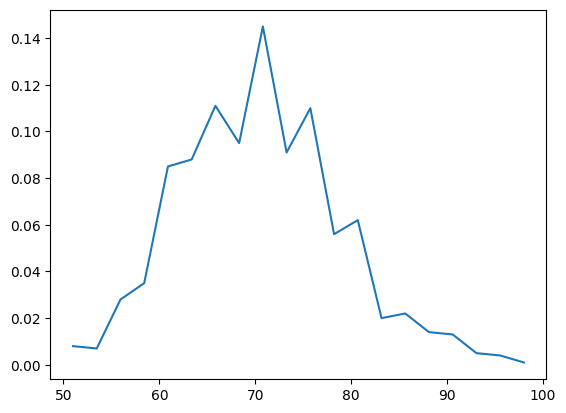

In [7]:
sample = []

for i in range(n):
    sample.append(sps.bernoulli.rvs(p, size = n).sum()) # выборка возвращает 0 1 0, поэтому считаем единицы

keys, practical_binom = digitize(sample, bin_count)
    
plt.plot(keys, practical_binom)
plt.show()

<strong>3. Соответсвие моделей с $\chi^2$</strong>

Проведем $\chi^2$ тест, на соответствие данных теоретической модели.

In [8]:
theory_sized = []

for i in range(len(practical_binom)): # преобразуем эксперементальные данные в более узкий размер наблюдаемых
    index = int(len(theory_binom) / len(practical_binom) * i)
    theory_sized.append(theory_binom[index])

chisquare(theory_sized, practical_binom)

Power_divergenceResult(statistic=6.786266306905371, pvalue=0.9952688308379387)

$p-value > 0.05$, значит мы не можем отбросить гипотезу о их соответствии

### Задача 2

Создать  таблицы 100 значений для одной трансцендентной и одной рациональной функции (из приложения 1) в соответствии со своим вариантом. Используя эту таблицу выписать 100 цифр, выбирая из каждого значения функции  второй знак справа от запятой. Для полученной выборки проверить по критерию $\chi^2$ гипотезу о равновероятности получить любую цифру на втором месте после запятой, при уровне значимости 0.01.

In [9]:
def get_second_or_zero(x):
    return int(x * 100) % 10

def to_second_digits(array):
    digits_collected = list(map(lambda x: get_second_or_zero(x), array))
    digits_count = {}

    for i in range(len(set(digits_collected))):
        digits_count[i] = digits_collected.count(i)
        
    return digits_count

Делаем эталонный массив с равномерным распределением цифр

In [10]:
digits = [10] * 10

Сделаем функцию для проверки гипотезы о равновероятности получить любую цифру при уровне значимости 0.01

In [11]:
def check(sample):
    check_p_value(
        actual = chisquare(digits, list(sample)).pvalue, 
        critical = 0.01
    )

<strong>1. Создаем словари</strong>

In [12]:
transcendental_function_table = {}
polynomial_table = {}

N = 100

for i in range(1, N + 1):
    x = i / N # делаем так, чтобы были дробные числа, по возрастанию, чтобы потом не сортировать лишний раз
    transcendental_function_table[x] = eval(transcendental_function) # чтобы можно было решить любой вариант
    polynomial_table[x] = eval(polynomial)

<strong>2. Трансцендентная функция</strong>

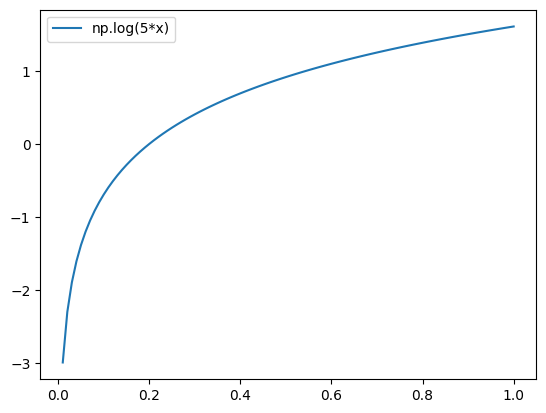

Нет оснований отвергать гипотезу, p-value = 0.0314974175867212
Цифра: Количество


{0: 12, 1: 13, 2: 8, 3: 11, 4: 9, 5: 8, 6: 9, 7: 9, 8: 9, 9: 12}

In [13]:
plt.plot(transcendental_function_table.keys(), transcendental_function_table.values(), label = transcendental_function)
plt.legend()
plt.show()

digits_count = to_second_digits(list(transcendental_function_table.values()))
check(digits_count)

print('Цифра: Количество')
digits_count

<strong>3. Рациональная функция</strong>

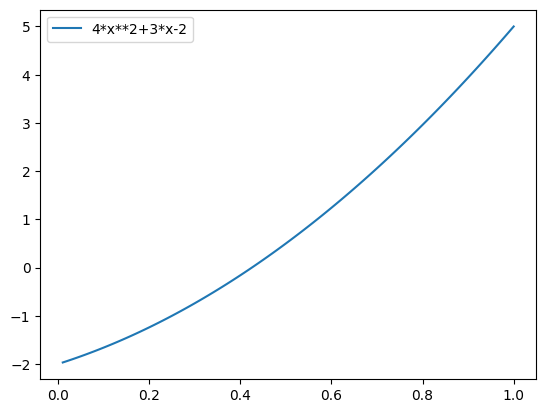

Нет оснований отвергать гипотезу, p-value = 0.0314974175867212
Цифра: Количество


{0: 10, 1: 9, 2: 8, 3: 13, 4: 14, 5: 6, 6: 15, 7: 11, 8: 7, 9: 7}

In [14]:
plt.plot(polynomial_table.keys(), polynomial_table.values(), label = polynomial)
plt.legend()
plt.show()

digits_count = to_second_digits(list(polynomial_table.values()))
check(digits_count)

print('Цифра: Количество')
digits_count

### Задача 3

Смоделировать первую выборку $X_n$ гамма-распределения с  показателями $a, scale$ (из приложения 1 в соотвтествии с вашим вариантом) объемом 100.
А также вторую выборку $Y_n=X_n+\varepsilon_n$, где $\varepsilon_n$ моделирует ошибку измерения и само является 
выборкой объема 100 нормального распределения со средним $\mu=0$ и отклонением $\sigma=scale/4$.  Проверить критерием Колмогорова-Смирнова (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) гипотезу о том, что выборка $X_n $ согласуется с гипотезой о $ \Gamma$-распределении, и что выборки  $X_n$ и $Y_n$ однородны, то есть принадлежат одному распределению.

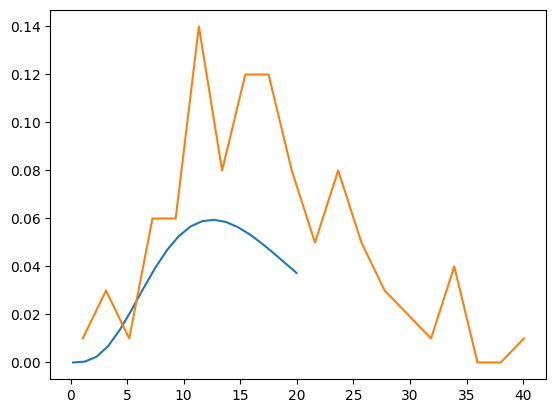

Нет оснований отвергать гипотезу, p-value = 0.08105771161340149
Gamma распределение: KstestResult(statistic=0.4, pvalue=0.08105771161340149, statistic_location=0.05944816249631337, statistic_sign=-1)
Нет оснований отвергать гипотезу, p-value = 0.469506448503778
Выборки X и Y однородны: KstestResult(statistic=0.12, pvalue=0.469506448503778, statistic_location=13.293976793933043, statistic_sign=1)


In [15]:
N = 100
𝜎 = gamma_scale / 4
bin_size = 20

gamma_distribution = sps.gamma.rvs(gamma_a, scale = gamma_scale, size = N)
norm_distribution = sps.norm.rvs(np.sqrt(𝜇), 𝜎, size = N)

x = np.linspace(sps.gamma.ppf(o, gamma_a), sps.gamma.ppf(1 - o, gamma_a), bin_size)
gamma_pdf = sps.gamma.pdf(x, gamma_a, scale = gamma_scale)

keys, practical_gamma = digitize(gamma_distribution, bin_size)

plt.plot(x, gamma_pdf)
plt.plot(keys, practical_gamma)
plt.show()

def kstest(message, first, second):
    result = sps.kstest(first, second)
    check_p_value(actual = result.pvalue, critical = 0.05)
    print(f'{message}: {result}')

kstest('Gamma распределение', practical_gamma, gamma_pdf)
kstest('Выборки X и Y однородны', gamma_distribution, gamma_distribution + norm_distribution)

### Задача 4

Смоделировать выборку вида $X_n+\varepsilon_n$, где $X_n$-распределено нормально с  показателями $\mu_1$ и отклонением $\sigma_1$ (из приложения 1 в соотвтествии с вашим вариантом), $\varepsilon_n$ моделирует 
ошибку измерения и само является 
выборкой нормального распределения со средним $\mu_2=0$ и отклонением $\sigma_2$. Протестировать на нормальность полученную выборку.

Проиллюстрировать графически зависимость результатов тестирования от объема выборки при $\sigma_2=\sigma_1/i$, где i пробегает множество натуральных чисел меньших 20.


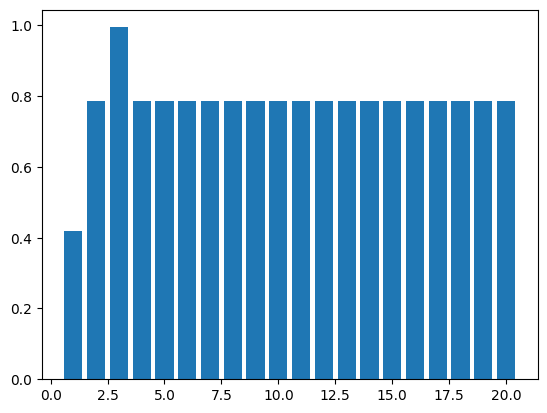

При пороге p-value в 0.8, 1 из 20\
    нулевых гипотез о нормальности полученного распределения не отвергнуто


In [16]:
N = 2000
norm_x = sps.norm.rvs(𝜇, 𝜎, size = N)
size = 20
bin_count = 10
critical = 0.8

kstest_result = []
debug = False

for i in range(1, size + 1):
    norm_e = sps.norm.rvs(0, 𝜎 / i, size = N)
    
    keys_x, values_x = digitize(norm_x, bin_count = bin_count)
    keys_e, values_e = digitize(norm_e, bin_count = bin_count)
    keys, values = digitize(norm_x + norm_e, bin_count = bin_count)
    interval = np.linspace(min(keys), max(keys), bin_count)
    
    norm = sps.norm.pdf(interval, 𝜇, 𝜎)
    
    kstest_result.append(sps.kstest(norm, values_x).pvalue)
    
    if debug:
        plt.plot(interval, values_x, color = 'green')
        plt.plot(interval, values_e, color = 'blue')
        plt.plot(interval, values, color = 'red')
        plt.show()

plt.bar(range(1, size + 1), kstest_result)
plt.show()

print(
    fr"При пороге p-value в {critical}, {sum(x > critical for x in kstest_result)} из {size}\
    нулевых гипотез о нормальности полученного распределения не отвергнуто"
)